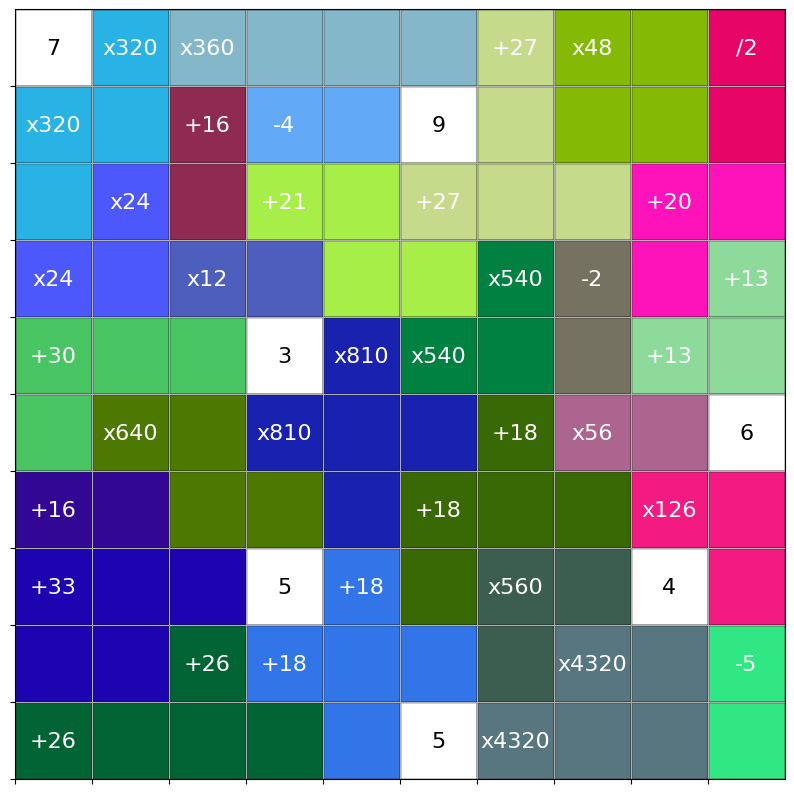

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def generate_unique_hex_color(existing_colors):
    while True:
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        if color not in existing_colors:
            return color

existing_colors = set()

cages = {
    'A': {'label': 'x320', 'operation': 'x'},
    'B': {'label': 'x24', 'operation': 'x'},
    'C': {'label': '+30', 'operation': '+'},
    'D': {'label': '+16', 'operation': '+'},
    'E': {'label': '+36', 'operation': '+'},
    'F': {'label': '+26', 'operation': '+'},
    'G': {'label': 'x360', 'operation': 'x'},
    'H': {'label': '+21', 'operation': '+'},
    'I': {'label': '+33', 'operation': '+'},
    'J': {'label': 'x12', 'operation': 'x'},
    'K': {'label': 'x640', 'operation': 'x'},
    'L': {'label': '-4', 'operation': '-'},
    'M': {'label': 'x810', 'operation': 'x'},
    'N': {'label': '+16', 'operation': '+'},
    'O': {'label': 'x540', 'operation': 'x'},
    'P': {'label': '+27', 'operation': '+'},
    'Q': {'label': '+18', 'operation': '+'},
    'R': {'label': 'x560', 'operation': 'x'},
    'S': {'label': '+18', 'operation': '+'},
    'T': {'label': 'x540', 'operation': 'x'},
    'U': {'label': '+27', 'operation': '+'},
    'V': {'label': '+18', 'operation': '+'},
    'W': {'label': 'x560', 'operation': 'x'},
    'X': {'label': '-2', 'operation': '-'},
    'Y': {'label': '+20', 'operation': '+'},
    'Z': {'label': 'x56', 'operation': 'x'},
    'A1': {'label': '/2', 'operation': '/'},
    'B1': {'label': '+13', 'operation': '+'},
    'C1': {'label': 'x48', 'operation': 'x'},
    'D1': {'label': 'x126', 'operation': 'x'},
    'E1': {'label': '-5', 'operation': '-'},
    'F1': {'label': 'x4320', 'operation': 'x'},
}

for key, value in cages.items():
    color = generate_unique_hex_color(existing_colors)
    existing_colors.add(color)
    value['color'] = color

kenken = [
    [7, 'A', 'G', 'G', 'G', 'G', 'P', 'C1', 'C1', 'A1'],
    ['A', 'A', 'N', 'L', 'L', 9, 'P', 'C1', 'C1', 'A1'],
    ['A', 'B', 'N', 'H', 'H', 'P', 'P', 'P', 'Y', 'Y'],
    ['B', 'B', 'J', 'J', 'H', 'H', 'T', 'X', 'Y', 'B1'],
    ['C', 'C', 'C', 3, 'M', 'T', 'T', 'X', 'B1', 'B1'],
    ['C', 'K', 'K', 'M', 'M', 'M', 'S', 'Z', 'Z', 6],
    ['D', 'D', 'K', 'K', 'M', 'S', 'S', 'S', 'D1', 'D1'],
    ['I', 'I', 'I', 5, 'Q', 'S', 'W', 'W', 4, 'D1'],
    ['I', 'I', 'F', 'Q', 'Q', 'Q', 'W', 'F1', 'F1', 'E1'],
    ['F', 'F', 'F', 'F', 'Q', 5, 'F1', 'F1', 'F1', 'E1']
]
size=10

fixed_values = {
    
  
}

fig, ax = plt.subplots(figsize=(10, 10)) 

for i in range(size):
    for j in range(size):
        # Obtener operación y color asociados con la celda
        op = cages.get(kenken[i][j], {'color': 'white', 'label': ''})

        # Dibuja el rectángulo
        rect = patches.Rectangle((j, size - i - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=op['color'])
        ax.add_patch(rect)

        # Añade el texto correspondiente (etiqueta del "cage" o número)
        if isinstance(kenken[i][j], str):  # Para las celdas de "cages"
            label = op.get('label', '')  # Si no hay etiqueta, cadena vacía
            # Mostrar la etiqueta solo si es el inicio de un nuevo "cage"
            if (i == 0 and j == 0) or (kenken[i][j] != kenken[i - 1][j] and kenken[i][j] != kenken[i][j - 1]):
                ax.text(j + 0.5, size - i - 0.5, label, ha='center', va='center', color='white', fontsize=16)
        else:  # Para los números en el tablero
            ax.text(j + 0.5, size - i - 0.5, str(kenken[i][j]), ha='center', va='center', fontsize=16)

ax.set_xlim(0, size)
ax.set_ylim(0, size)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')
plt.grid(True)

plt.show()


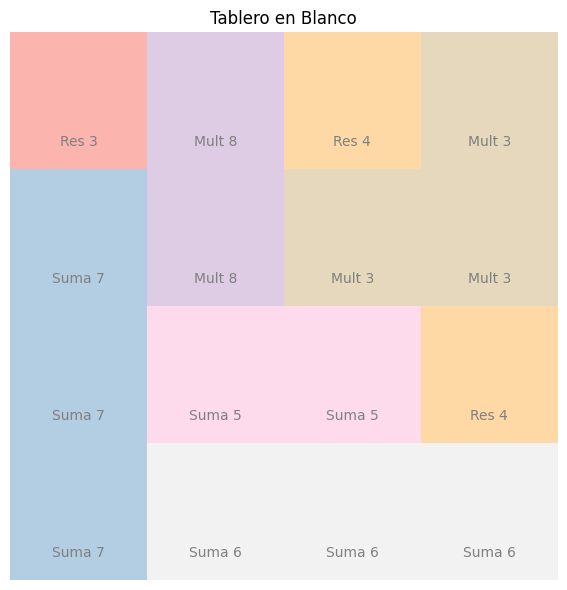

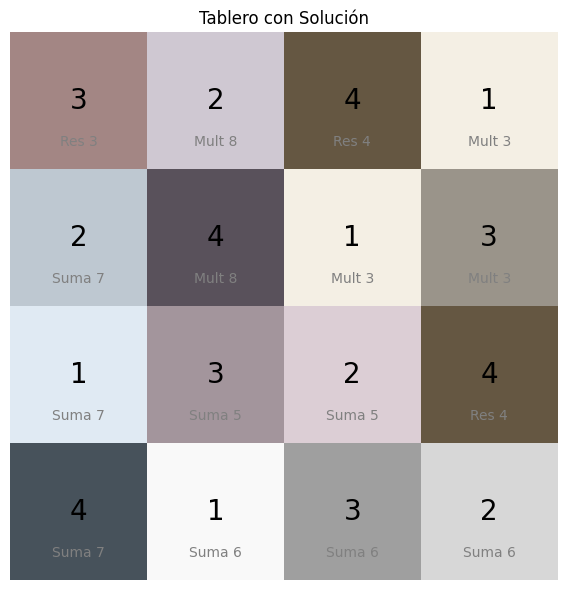

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from constraint import Problem, AllDifferentConstraint


def graficar_tablero(valores, anotaciones, areas, titulo="Tablero"):
    tablero = np.zeros((4, 4))
    color_map = np.zeros((4, 4))  

    for i in range(1, 5):
        for j in range(1, 5):
            cell = f"cell{i}{j}"
            if cell in valores:
                tablero[i - 1, j - 1] = valores[cell]
            if cell in areas:
                color_map[i - 1, j - 1] = areas[cell]

    plt.figure(figsize=(6, 6))
    plt.title(titulo)
    plt.imshow(color_map, cmap="Pastel1", aspect='equal', interpolation='nearest')  


    if np.any(tablero != 0):
        plt.imshow(tablero, cmap="Greys", alpha=0.6, aspect='equal', interpolation='nearest')  
        
    for i in range(4):
        for j in range(4):
            cell = f"cell{i + 1}{j + 1}"
            valor = str(int(tablero[i, j])) if tablero[i, j] != 0 else ' '
            anotacion = anotaciones.get(cell, '') 

            plt.text(j, i, valor, ha='center', va='center', fontsize=20)
            if anotacion:
                plt.text(j, i + 0.3, anotacion, ha='center', va='center', fontsize=10, color='gray') 

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')  
    plt.tight_layout()
    plt.show()


kenken = Problem()
domain = [1, 2, 3, 4]


cells = [f"cell{i}{j}" for i in range(1, 5) for j in range(1, 5)]

kenken.addVariables(cells, domain)


for i in range(1, 5):
    kenken.addConstraint(AllDifferentConstraint(), [f"cell{i}{j}" for j in range(1, 5)])  
    kenken.addConstraint(AllDifferentConstraint(), [f"cell{j}{i}" for j in range(1, 5)])  

kenken.addConstraint(lambda x, y, z: x + y + z == 7, ["cell21", "cell31", "cell41"])
kenken.addConstraint(lambda x: x == 3, ["cell11"])
kenken.addConstraint(lambda x, y: x * y == 8, ["cell12", "cell22"])
kenken.addConstraint(lambda x: x == 4, ["cell13"])
kenken.addConstraint(lambda x, y, z: x * y * z == 3, ["cell14", "cell23", "cell24"])
kenken.addConstraint(lambda x, y: x + y == 5, ["cell32", "cell33"])
kenken.addConstraint(lambda x: x == 4, ["cell34"])
kenken.addConstraint(lambda x, y, z: x + y + z == 6, ["cell42", "cell43", "cell44"])

areas = {
    "cell11": 1,
    "cell21": 2,
    "cell31": 2,
    "cell41": 2,
    "cell12": 3,
    "cell22": 3,
    "cell13": 4,
    "cell14": 5,
    "cell23": 5,
    "cell24": 5,
    "cell32": 6,
    "cell33": 6,
    "cell34": 4,
    "cell42": 7,
    "cell43": 7,
    "cell44": 7,
}

anotaciones = {
    "cell11": "Res 3",
    "cell21": "Suma 7",
    "cell31": "Suma 7",
    "cell41": "Suma 7",
    "cell12": "Mult 8",
    "cell22": "Mult 8",
    "cell13": "Res 4",
    "cell14": "Mult 3",
    "cell23": "Mult 3",
    "cell24": "Mult 3",
    "cell32": "Suma 5",
    "cell33": "Suma 5",
    "cell34": "Res 4",
    "cell42": "Suma 6",
    "cell43": "Suma 6",
    "cell44": "Suma 6",
}

soluciones = kenken.getSolutions()

graficar_tablero({}, anotaciones, areas, "Tablero en Blanco")

if soluciones:
    graficar_tablero(soluciones[0], anotaciones, areas, "Tablero con Solución")
else:
    print("No se encontró solución.")





In [ ]:
from constraint import Problem, AllDifferentConstraint

kenken = Problem()

domain = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cells = ["cell11", "cell12", "cell13", "cell14", "cell15","cell16","cell17","cell18","cell19","cell110",
         "cell21", "cell22", "cell23", "cell24", "cell25","cell26","cell27","cell28","cell29","cell210",
         "cell31", "cell32", "cell33", "cell34", "cell35","cell36","cell37","cell38","cell39","cell310",
         "cell41", "cell42", "cell43", "cell44", "cell45","cell46","cell47","cell48","cell49","cell410",
         "cell51", "cell52", "cell53", "cell54", "cell55","cell56","cell57","cell58","cell59","cell510",
         "cell61", "cell62", "cell63", "cell64", "cell65","cell66","cell67","cell68","cell69","cell610",
         "cell71", "cell72", "cell73", "cell74", "cell75","cell76","cell77","cell78","cell79","cell710",
         "cell81", "cell82", "cell83", "cell84", "cell85","cell86","cell87","cell88","cell89","cell810",
         "cell91", "cell92", "cell93", "cell94", "cell95","cell96","cell97","cell98","cell99","cell910",
         "cell101", "cell102", "cell103", "cell104", "cell105","cell106","cell107","cell108","cell109","cell1010"]

kenken.addVariables(cells, domain)

for i in range(1, 11):
    kenken.addConstraint(AllDifferentConstraint(), [f"cell{i}1", f"cell{i}2", f"cell{i}3", f"cell{i}4", f"cell{i}5",
                                                    f"cell{i}6", f"cell{i}7", f"cell{i}8", f"cell{i}9", f"cell{i}10"])
    
    kenken.addConstraint(AllDifferentConstraint(), [f"cell1{i}", f"cell2{i}", f"cell3{i}", f"cell4{i}", f"cell5{i}",
                                                    f"cell6{i}", f"cell7{i}", f"cell8{i}", f"cell9{i}", f"cell10{i}"])
    
kenken.addConstraint(lambda x: x == 7, ["cell11"])
kenken.addConstraint(lambda w, x, y, z: w * x * y * z == 320, ["cell12", "cell21", "cell31", "cell22"])
kenken.addConstraint(lambda x, y, z: x * y * z == 24, ["cell41", "cell42", "cell32"])
kenken.addConstraint(lambda w, x, y, z: w + x + y + z == 30, ["cell51", "cell52", "cell53", "cell61"])
kenken.addConstraint(lambda x, y: x + y == 16, ["cell71", "cell72"])
kenken.addConstraint(lambda v, w, x, y, z: v + w + x + y + z == 33, ["cell81", "cell82", "cell83", "cell91", "cell92"])
kenken.addConstraint(lambda v, w, x, y, z: v + w + x + y + z == 26, ["cell101", "cell102", "cell103", "cell93", "cell104"])
kenken.addConstraint(lambda w, x, y, z: w * x * y * z == 360, ["cell13", "cell14", "cell15", "cell16"])
kenken.addConstraint(lambda x, y: x + y == 16, ["cell23", "cell33"])
kenken.addConstraint(lambda x, y: x * y == 12, ["cell43", "cell44"])
kenken.addConstraint(lambda x: x == 3, ["cell54"])
kenken.addConstraint(lambda w, x, y, z: w * x * y * z == 640, ["cell62", "cell63", "cell73", "cell74"])
kenken.addConstraint(lambda x: x == 5, ["cell84"])
kenken.addConstraint(lambda x, y: x - y == 4, ["cell24", "cell25"])
kenken.addConstraint(lambda w, x, y, z: w + x + y + z == 21, ["cell34", "cell35", "cell45", "cell46"])
kenken.addConstraint(lambda v, w, x, y, z: v * w * x * y * z == 810, ["cell64", "cell65", "cell66", "cell75", "cell55"])
kenken.addConstraint(lambda v, w, x, y, z: v + w + x + y + z == 18, ["cell94", "cell95", "cell96", "cell95", "cell105"])



